### Importing the Libraries

In [1]:
import numpy as np  # For using n-d array mathematical operations
import pandas as pd # For open csv files and create dataframe
import matplotlib.pyplot as plt # For plotting graphs

### Reading CSV Files and Checking the content in it

In [2]:
# Opening csv files
dataset = pd.read_csv('startup_funding.csv', skipinitialspace = True, encoding = 'utf-8')
df = dataset.copy() # Copying the dataset dataframe in df in case anything goes wrong, we can start again
df.head(10) # Showing first 10 rows in df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN


### Solution for given problem
To find top 5 industry with maximum amount of funding, we need to check StartupName and AmountInUSD column

Paytm 30.35
Flipkart 29.30
Ola 24.63
Snapdeal 9.08
Oyo 6.64


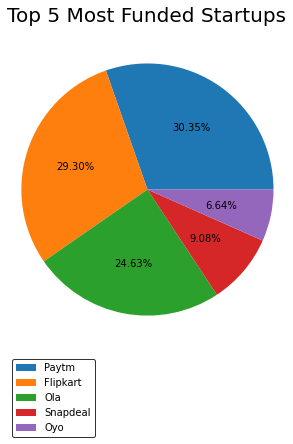

In [15]:
# Replacing incorrect startup names with correct startup name in StartupName column
df.StartupName.replace('Flipkart.com', 'Flipkart', inplace = True)
df.StartupName.replace('Ola Cabs', 'Ola', inplace = True)
df.StartupName.replace('Olacabs', 'Ola', inplace = True)
df.StartupName.replace('Oyo Rooms', 'Oyo', inplace = True)
df.StartupName.replace('OyoRooms', 'Oyo', inplace = True)
df.StartupName.replace('Paytm Marketplace', 'Paytm', inplace = True)
df.StartupName.fillna('', inplace = True)

# Replace nan value in AmountInUSD column
df.AmountInUSD.fillna('0', inplace = True)

# Fetching all startup name and amount corresponding to it
startupName = df.StartupName
amountInUSD = df.AmountInUSD

# Creating a dictionary to save totalamount for each startup as startupname as key and totalamount as value
amountAsPerStartup = {} 
# Getting totalamount for each startup
for index in range(len(startupName)):
    name = startupName[index]
    amount = int(str(amountInUSD[index]).replace(',',''))
    if name != '':
        amountAsPerStartup[name] = amountAsPerStartup.get(name,0)+amount

# Fetching startup name and amount collected from amountAsPerStartup
startupName = list(amountAsPerStartup.keys())
amount = list(amountAsPerStartup.values())
# Creating 2D array from 1D arrays using zip() function in python
amountAsPerStartup = list(zip(startupName,amount))
amountAsPerStartup.sort(reverse = True, key = lambda x:x[1]) # Sorting the array in descending order as per amount

amountAsPerStartup = np.array(amountAsPerStartup) # Converting into 2D numpy array
startupName = amountAsPerStartup[:,0] # Fetching all startup name as per descending order
amount = np.array(amountAsPerStartup[:,1], dtype = int) # Fetching amount for each startup
totalAmount = np.sum(amount[:5]) # Adding amount of top 5 most funded startups

# Printing top 5 most funded startups 
for index in range(5):
    perc = amount[index]/totalAmount*100
    print(startupName[index],'{:.2f}'.format(perc))

# Plotting the Pie Chart
plt.figure(figsize = (5,6))
plt.pie(amount[:5], autopct = '%.2f%%')
plt.axis('equal')
plt.title('Top 5 Most Funded Startups', fontsize = 20)
plt.legend(labels = startupName[:5], edgecolor = 'black', loc = 'upper left', bbox_to_anchor = (0,0))
plt.show()